In [66]:
import numpy as np
import matplotlib.pyplot as plt


### Créer un signal u(t) impulsion périodique avec to= T/2 d'amplitude E

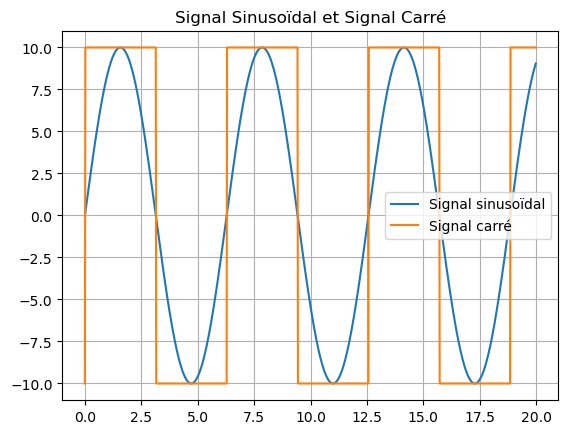

In [67]:
T=20     #période du signal
to=T/2   #demi-période pour onde carrée = durée du pic
E=10     #amplitude du signal

t=np.arange(0, T, T/1000)   #création d'un vecteur temps avec un pas de T/1000

def signal(t,E):    #fctn du signal carré
    u=[]
    for i in range(len(t)):
        if np.pi * 2* np.sin(t[i])*(1/T) >0:
            u.append(E)
        else:
            u.append(-E)
    return(u)

# Affichage du signal carré + sinusoidale
plt.plot(t, E * np.sin(t), label='Signal sinusoïdal')
plt.plot(t, signal(t,E), label='Signal carré')
plt.grid(True)
plt.legend()
plt.title('Signal Sinusoïdal et Signal Carré')
plt.show()


### Algo de Faurier u(t) -> (a0, an, bn)

In [68]:
# Création d'un vecteur temps pour le calcul des coefficients
tps = np.linspace(0, T, 1000)

periode = np.linspace(0, T, 1000)  # Création d'une période temps
pas = periode[1] - periode[0]      # Calcul des pas de la période

# Fonctions coefficients de la série de Fourier
def a(n):
    return sum(signal(periode,E) * np.cos(2 * np.pi * n * periode / T) * pas) * 2 / T * (1 / 2 * (n == 0) + 1 * (n != 0))

def b(n):
    return sum(signal(periode,E) * np.sin(2 * np.pi * n * periode / T) * pas) * 2 / T


### Tracer le spectre de puissance (cn²/to) en fonction de n

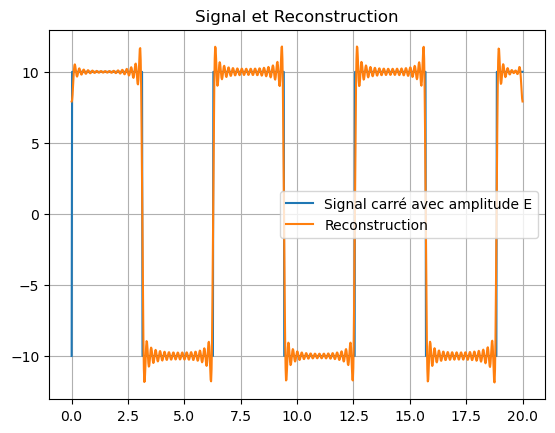

In [72]:
# Fonction pour reconstruire le signal à partir des coefficients de Fourier

def v(t, n=1):
    def cst(t0):
        return a(0)
    vi = cst(t)
    for i in range(1, n+1):
        vi += a(i) * np.cos(2 * np.pi * i * t / T) + b(i) * np.sin(2 * np.pi * i * t / T)
    return vi

n=100 #nombre de termes de la série de Fourier pour la reconstruction

U = signal(tps, E)   #signal carré que l'on veut reconstruire
V = v(tps, n)   # Reconstruction du signal avec n termes

# Courbes
plt.plot(tps, U, label='Signal carré avec amplitude E')
plt.plot(tps, V, label='Reconstruction')
plt.title('Signal et Reconstruction')
plt.legend()
plt.grid(True)
        

### Reconstruire le signal avec N harmoniques, Comparer avec u(t)

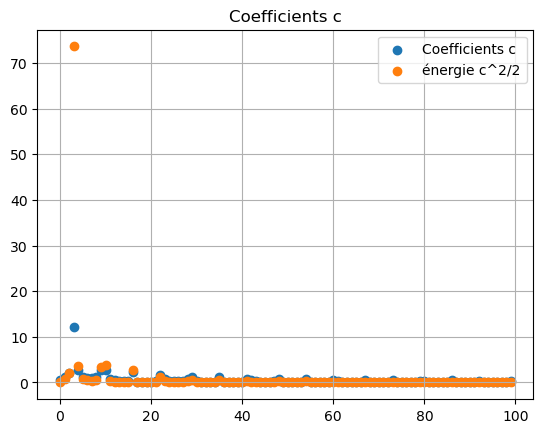

In [75]:
# Fonction pour calculer les coefficients c(n) de la série de Fourier
def c(n):
    a_coeffs = [a(i) for i in range(n)]
    b_coeffs = [b(i) for i in range(n)]

    # Calcul des coefficients c(n) en utilisant la formule c(n) = sqrt(a(n)^2 + b(n)^2)
    c_coeffs = [np.sqrt(a_coeffs[i] ** 2 + b_coeffs[i] ** 2) for i in range(n)]

    # Retourne les indices (n) et les coefficients c(n)
    return [i for i in range(n)], c_coeffs

# Calcul des coefficients c jusqu'à n
ni, ci = c(n)

# Affichage des coefficients c
plt.scatter(ni, ci, label='Coefficients c')
plt.scatter(ni, [(cu**2) / 2 for cu in ci], label='énergie c^2/2')
plt.title('Coefficients c')
plt.legend()
plt.grid(True)
plt.show()